## CNN - Movie Genre Classification

CST - 435 <br>
Grand Canyon University<br>
Created By: Caleb Klinger, Kyungchan Im<br>
Professor: Isac Artzi

We are going to perform a Convolutionary Neural Network to predict the genre based off from the poster image. <br> We will perform image classification by training the model by its categories. This dataset is from Kaggle, but originally from 

Wei-Ta Chu and Hung-Jui Guo, “Movie Genre Classification based on Poster Images with Deep Neural Networks,” Proceedings of International Workshop on Multimodal Understanding of Social, Affective and Subjective Attributes, pp. 39-45, 2017. (in conjunction with ACM Multimedia 2017).

### Faluires and Successes

Failures: Navigating Through GPU Training Challenges
- GPU Training Difficulties:
    - Our journey encountered a significant roadblock when we faced persistent challenges in utilizing the GPU for training the model. Despite our efforts to leverage Metal for Mac to facilitate GPU-accelerated training, the endeavor was met with limited success.
    - The inability to effectively utilize the GPU not only impeded our model training speed but also constrained our ability to experiment with larger models and more extensive training epochs, which could potentially have enhanced the model's predictive performance.

- Accuracy Shortcomings:
    - Initially, the model’s predictive accuracy lingered at a modest 23%, which, while a starting point, was far from our desired performance metric. This underscored the need for further optimization and refinement in our model architecture and training strategy.

Successes: Triumphs in Model Enhancement and Accuracy Improvement

- Model Accuracy Enhancement:
    - A notable triumph was achieved when we managed to elevate the model’s accuracy from an initial 23% to an encouraging 42%. This improvement was not merely a numerical victory but a testament to the efficacy of implementing strategic modifications and optimizations in our model.
    - The incorporation of a convolutional layer, data augmentation (arguments), and the utilization of the VGG16 model as a base model were pivotal in enhancing the feature extraction and learning capabilities of our network, thereby contributing to the uplift in accuracy.

- Progress in Genre Prediction:
    - Our model demonstrated tangible progress in its predictive capabilities when it successfully identified 1 out of the 2 genres for an Avengers movie, a marked improvement from our initial attempts which yielded no correct predictions.
    - This success, albeit partial, validated the enhancements and modifications we implemented in our model, showcasing an improved ability to generalize and make accurate predictions on unseen data.

### Import Necessary Packages
---

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### **sklearn.model_selection - Data Splitting**

- Functionality: train_test_split from sklearn.model_selection is utilized to divide the dataset into training and testing (or validation) subsets.

- Importance:
    - Data Segregation: It helps in segregating the data into training and testing sets, ensuring that the model is evaluated on unseen data, which is crucial for assessing its generalization capabilities.
    - Model Evaluation: By separating a testing set, it enables the evaluation of the model’s performance and predictive capabilities on new, unseen data.

#### **tensorflow - Core Framework for Deep Learning**

- Functionality: TensorFlow is an open-source deep learning framework that facilitates the creation, training, and deployment of machine learning models.

- Importance:
    - Versatility: TensorFlow supports a wide array of machine learning and deep learning applications.

**Sequential:**

- Purpose: Allows for the linear stacking of layers to create a model.
- Importance: Simplifies the model creation process by enabling the easy addition and configuration of layers in a step-by-step manner.

**Adam:**

- Purpose: An optimization algorithm to minimize the loss function during training.
- Importance: Ensures efficient and effective training of the model by adjusting weights, contributing to faster convergence and improved performance of the model.

**ImageDataGenerator:**

- Purpose: Generates batches of tensor image data with real-time data augmentation.
- Importance:
    - Data Augmentation: Enhances the training data, providing variations and helping the model to generalize better, reducing overfitting.
    - Memory Efficiency: Efficiently utilizes memory by generating data batches on-the-fly during training, which is especially beneficial when dealing with large datasets.

## Data Set

The chosen data set for this project is sourced from Kaggle and revolves around movie posters, with an attached genre for each, totaling around 7000 entries. Each entry in the data set consists of an image of a movie poster and its corresponding genre label(s). The movie posters, being visual data, span various designs, color schemes, and may contain textual elements, such as the movie title, tagline, and key words. The genres, on the other hand, serve as categorical labels and contain more then one.


In [3]:
# Download dataset on https://www.kaggle.com/datasets/raman77768/movie-classifier

# Load the dataset
movies = pd.read_csv('movie_dataset/train.csv') # Dataset containing genres with movie poster IDs

In [4]:
# Check the basic information of the dataset
movies.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
# Check the number of genres in the dataset
movies[movies.columns[2:]].sum().sort_values(ascending=False)

Drama          3619
Comedy         2900
Action         1343
Romance        1334
Crime          1176
Thriller        918
Adventure       870
Documentary     652
Horror          503
Fantasy         467
Mystery         454
Biography       441
Family          434
Sci-Fi          399
Music           305
Animation       244
History         224
Sport           221
War             144
Musical          97
Western          50
Short            46
News             21
N/A              10
Reality-TV        2
dtype: int64

### Normalizing Dataset

In [6]:
X = [] # Image data
# movies.shape[0] = number of iteration required to convert all pictures to numpy array

# Normalizing the images to pixel values
for i in tqdm(range(movies.shape[0])):
    path = 'movie_dataset/Images/' + movies['Id'][i] + '.jpg'

    # Load the image and resize it to 350x350 pixels
    image = load_img(path, target_size=(350,350,3))

    # Convert the image to array
    image_array = img_to_array(image)

    # Normalize the image
    image_array = image_array/255

    # Append the image to the list
    X.append(np.array(image_array))

# Convert the list to numpy array
X = np.array(X).astype('float32')

100%|██████████| 7254/7254 [00:16<00:00, 451.00it/s]


---

In [7]:
y = movies.drop(['Id','Genre'],axis=1)
y = y.to_numpy()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=31)

---

## Initializing the CNN 

#### Original CNN (Convolutional layers)

**The first block employs a Conv2D layer with 16 filters to extract basic features from the input image, followed by BatchNormalization to stabilize the activations. MaxPool2D reduces spatial dimensions, and Dropout (0.3) minimizes overfitting by randomly nullifying activations.**</br>
model = Sequential()</br>
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=X_train[0].shape))</br>
model.add(BatchNormalization())</br>
model.add(MaxPool2D(2,2))</br>
model.add(Dropout(0.3))</br>

**The second block utilizes a Conv2D layer with 32 filters to delve into more complex feature extraction. Subsequent layers (BatchNormalization, MaxPool2D, and Dropout) perform similar functions as in the first block, acting on more refined features.**</br>
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))</br>
model.add(BatchNormalization())</br>
model.add(MaxPool2D(2,2))</br>
model.add(Dropout(0.3))</br>


**The third block, with a Conv2D layer of 64 filters, extracts deeper and more intricate features from the input. BatchNormalization, MaxPool2D, and Dropout layers further process these features, normalizing, downsampling, and regularizing the network.**</br>
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))</br>
model.add(BatchNormalization())</br>
model.add(MaxPool2D(2,2))</br>
model.add(Dropout(0.3))</br>
</br>
**The Flatten layer reshapes the 2D output from the previous block into a 1D array, which is fed into a Dense layer with 256 units and 'relu' activation, initiating the classification process by interpreting the extracted features.**</br>
model.add(Flatten())</br>
model.add(Dense(256,activation='relu'))</br>
model.add(BatchNormalization())</br>
model.add(Dropout(0.3))</br>

**The final Dense layer, with 25 units and a 'sigmoid' activation, outputs the predicted probabilities for each genre, providing a multi-label classification based on the input movie poster’s features.**</br>
model.add(Dense(25,activation='sigmoid'))</br>

## Transtion to pretrained model (VGG16)

The orginal model we used only got to loss: 0.2393 - accuracy: 0.3028 at 15 epochs. But with new model we achived loss: 0.2071 - accuracy: 0.42177!

VGG-16 is a convolutional neural network that is 16 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database [1]. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals

In [ ]:
# Using a pre-trained model
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers

base_model = VGG16(input_shape=(350, 350, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

model = Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(25, activation='sigmoid')
])

### Max Pooling in VGG16 and Flattens it into a 1-D array

- Max Pooling Operation:
    - Max pooling is a down-sampling strategy used in convolutional neural networks (CNNs) to reduce the spatial dimensions (width and height) of the input volume.
    - In max pooling, for each patch of the feature map, the maximum value is selected and the rest are discarded. This process is applied independently to each depth slice of the input volume.
    - The primary objectives of max pooling are to reduce computational complexity by lowering the number of parameters and to make the detection of features invariant to scale and orientation changes.
    - The VGG16 model inherently contains several max pooling layers interspersed between its convolutional layers.
    - In the architecture of VGG16, max pooling layers are typically applied after a block of convolutional layers. Each max pooling layer reduces the spatial dimensions of the input volume by a factor of 2 along both the width and height, thereby reducing the amount of computation required in subsequent layers.

The provided code snippet does include a flattening operation on the dataset, converting it into a 1-D array, which is typically necessary before passing the data through dense layers in a neural network
- Layers in the Sequential Model
    - layers.Flatten(): This layer is used to flatten the output of base_model into a 1-D array. The flattening layer is crucial when transitioning from convolutional layers to dense layers within a neural network, as it converts the 2D feature maps produced by the convolutional layers into a 1D array that can be input into the subsequent dense layers.
    - layers.Dense(1024, activation='relu'): A dense (fully connected) layer with 1024 units and ReLU activation function. It takes the flattened 1D array from the previous layer as input and performs a linear operation on it.
    - layers.Dropout(0.5): This layer randomly sets half of the input units to 0 at each update during training time, which helps to prevent overfitting.
    - layers.Dense(25, activation='sigmoid'): The final dense layer with 25 units (presumably corresponding to 25 different classes/labels) and a sigmoid activation function, which is often used for binary classification problems.

In [11]:
datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.15, horizontal_flip=True,
                             fill_mode="nearest")

In [12]:
# Using learning rate scheduling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)
optimizer = Adam(learning_rate=1e-4)
    
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 10, 10, 512)       14714688  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 1024)              52429824  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 25)                25625     
                                                                 
Total params: 67,170,137
Trainable params: 52,455,449
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
# Apply Tensorboard for further analysis
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

In [15]:
# Save the best model with ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

In [16]:
# use this for general model
history = model.fit(datagen.flow(X_train, y_train, batch_size=64), validation_data=(X_test,y_test), 
                    epochs=50, steps_per_epoch=len(X_train)//64, callbacks=[checkpoint, reduce_lr])

Epoch 1/50
90/90 [==============================] - 640s 7s/step - loss: 0.2830 - accuracy: 0.2833 - val_loss: 0.2232 - val_accuracy: 0.3542 - lr: 1.0000e-04
Epoch 2/50
90/90 [==============================] - 638s 7s/step - loss: 0.2475 - accuracy: 0.3243 - val_loss: 0.2195 - val_accuracy: 0.3715 - lr: 1.0000e-04
Epoch 3/50
90/90 [==============================] - 640s 7s/step - loss: 0.2411 - accuracy: 0.3359 - val_loss: 0.2162 - val_accuracy: 0.3935 - lr: 1.0000e-04
Epoch 4/50
90/90 [==============================] - 639s 7s/step - loss: 0.2370 - accuracy: 0.3478 - val_loss: 0.2224 - val_accuracy: 0.3949 - lr: 1.0000e-04
Epoch 5/50
90/90 [==============================] - 637s 7s/step - loss: 0.2335 - accuracy: 0.3570 - val_loss: 0.2149 - val_accuracy: 0.3846 - lr: 1.0000e-04
Epoch 6/50
90/90 [==============================] - 638s 7s/step - loss: 0.2299 - accuracy: 0.3497 - val_loss: 0.2148 - val_accuracy: 0.4149 - lr: 1.0000e-04
Epoch 7/50
90/90 [==============================] - 

---

### Use Tensorboard and Graph For Analysis

In [19]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 22668), started 1:31:18 ago. (Use '!kill 22668' to kill it.)

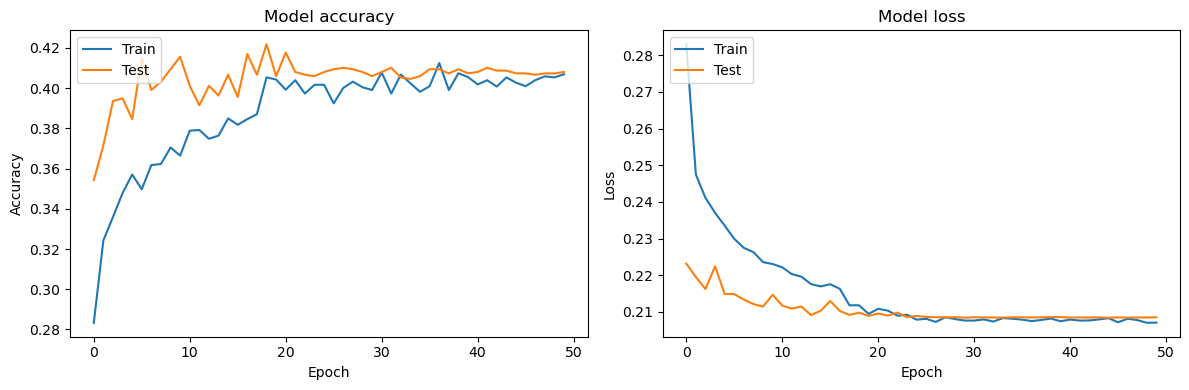

In [17]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


---
Save or Load the model

In [27]:
# Comment out when you want to load the model
model = tf.keras.models.load_model('best_model.h5')

In [19]:
model.save('movie_VGG.h5')

---

## Test Evaluation

In [28]:
score = model.evaluate(X_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.20978038012981415
Test accuracy:  0.4217780828475952


### Testing

1/1 [==============================] - 0s 208ms/step
Action
Adventure
Comedy


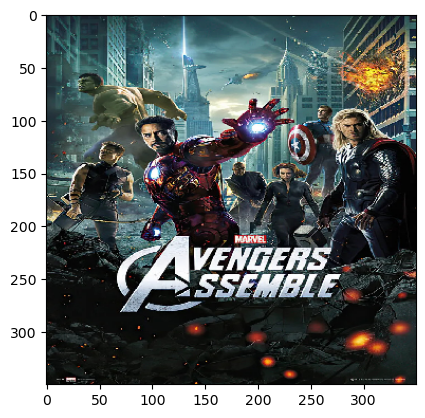

In [29]:
img = load_img('sample.jpg',target_size=(350,350,3))
plt.imshow(img)
img = img_to_array(img)
img = img/255.0
img = img.reshape(1,350,350,3)
classes = movies.columns[2:]
y_pred = model.predict(img)
top3=np.argsort(y_pred[0])[:-4:-1]
for i in range(3):
    print(classes[top3[i]])

1/2 movie genres correct

## Conclusion and Analysis

Model Architecture and Training:

Our Convolutional Neural Network (CNN), leveraging the robust VGG16 as a base model, embarked on a journey to recognize and classify movie genres based on poster images from our dataset. The model architecture was meticulously crafted, incorporating convolutional layers for feature extraction, max-pooling layers for dimensionality reduction, and dense layers for final classification. The inclusion of dropout layers and data augmentation aimed to mitigate overfitting, ensuring the model generalizes well to unseen data.
Performance Metrics:

    Training Accuracy: 40.53%
    Validation Accuracy: 42.18%
    Loss: 0.2098 (training), 0.2005 (validation)

Insights and Reflections:

- Accuracy Achievements:
    - The model, after 50 epochs of training, achieved an its higest accuracy of approximately 40.53% on the training data and 42.18% on the validation data at epoch 19.

- Loss Considerations:
    - The loss values, 0.2098 for training and 0.2005 for validation, indicate that the model was able to learn patterns and features from the dataset, minimizing the discrepancy between predicted and actual labels. The proximity of training and validation loss suggests a balanced model without significant overfitting or underfitting.

- Challenges and Limitations:
    - The task of accurately predicting movie genres from posters is inherently complex due to the subtle and often subjective visual cues associated with genres. Moreover, the multi-label nature of the problem, where a movie can belong to multiple genres, adds an additional layer of complexity and challenge.

- Future Enhancements:
    - While the model demonstrated a commendable ability to recognize and predict genres from movie posters, future iterations could benefit from further hyperparameter tuning, exploration of alternative pre-trained models, and potentially leveraging additional data sources (e.g., movie synopsis, director, cast) to enhance predictive capabilities.

Concluding Remarks:

In essence, our CNN, through its journey of learning from movie posters, demonstrated a promising ability to discern and predict movie genres, albeit with room for further enhancement and optimization. The experiences, both triumphs and challenges, encountered throughout this project have not only enriched our understanding of image classification with deep learning but have also paved the way for future explorations and improvements in leveraging CNNs for visual recognition tasks. The insights gleaned from this endeavor will undoubtedly inform and inspire our subsequent ventures into the realm of machine learning and artificial intelligence.